# Random Forest Algorithm with Python and Scikit-Learn


### Problem Definition
<p>The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.</p>


### Solution
<p>To solve this regression problem we will use the random forest algorithm via the Scikit-Learn Python library. We will follow the traditional machine learning pipeline to solve this problem. Follow these steps:</p>

In [26]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
# import dataset
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [28]:
# Prepring data for training
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


In [29]:
# lets divide the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [31]:
# Training the Algorithm
regessor = RandomForestClassifier(n_estimators=20, random_state=0)
regessor.fit(X_train, y_train)
y_pred = regessor.predict(X_test)

In [32]:
# Evaluating the Algorithm
from sklearn.metrics import confusion_matrix
print("Mean Absolute Error:", round(np.mean(abs(y_pred - y_test)), 2))
print("Mean Squared Error:", round(np.mean((y_pred - y_test)**2), 2))
print("Root Mean Squared Error:", round(np.sqrt(np.mean((y_pred - y_test)**2)), 2))


Mean Absolute Error: 281.8
Mean Squared Error: 130270.4
Root Mean Squared Error: 360.93


Text(0.5, 1.0, 'Random Forest Regression')

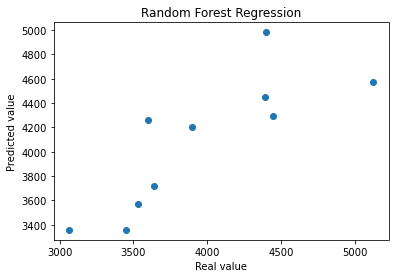

In [37]:
# Create a RMSE score chart
from sklearn.metrics import mean_squared_error
from math import sqrt
plt.scatter(y_test, y_pred)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Random Forest Regression')